# Spectral Tests with the PRBS
The prbs spectrum spreads all the way to 6 GHz as shown in the figure below.

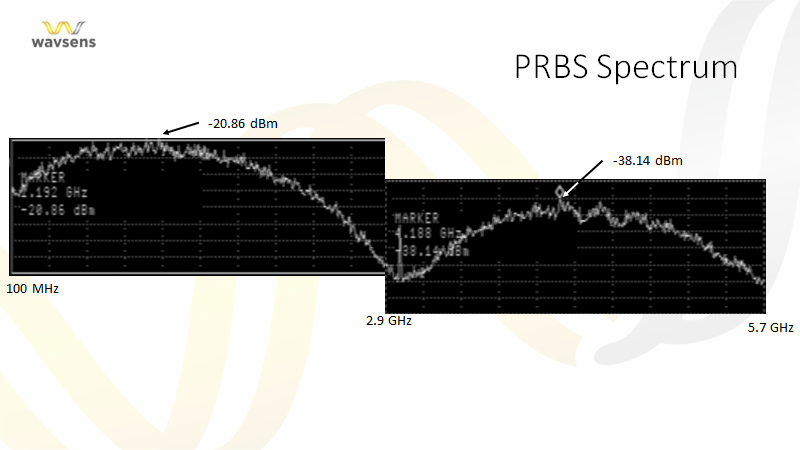

So I will try to emulate this spectrum as a coherent spectrum and see what kind of signal I get.

In [1]:
import numpy as np
from matplotlib import pyplot as pl

In [2]:
N = 12864
freq = np.fft.fftfreq(N,d=1/12)
A = np.zeros(12864)
frange = np.linspace(-1,1,N//4+1,endpoint=True)
envelope = np.exp(-5*frange**2)
A[N//4:N//2+1] = envelope
A[N//2+1:3*N//4] = envelope[1:-1]
B = 1+0*A

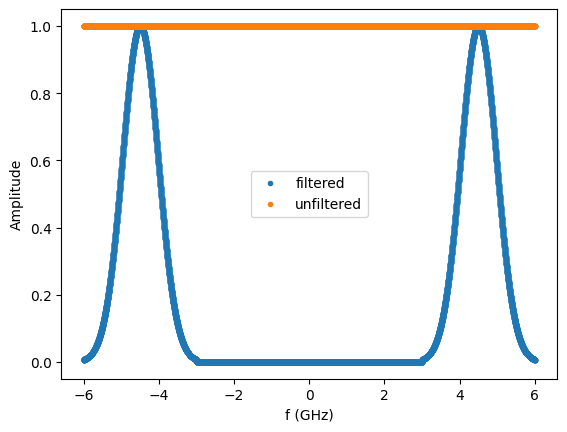

In [3]:
%matplotlib inline
pl.plot(freq,A,'.',label='filtered')
pl.plot(freq,B,'.',label='unfiltered')
ax = pl.gca()
ax.set_xlabel('f (GHz)')
ax.set_ylabel('Amplitude')
ax.legend()

Text(0, 0.5, 'Amplitude')

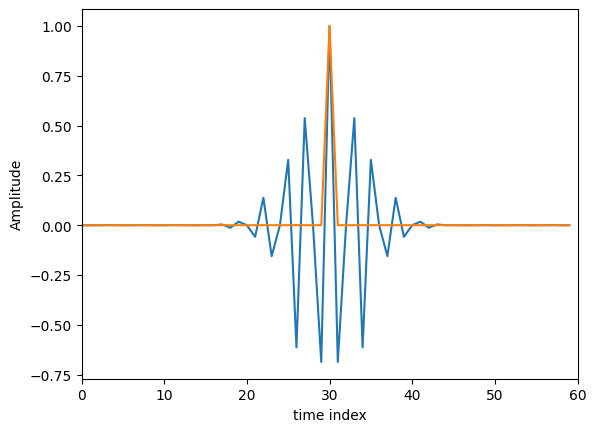

In [4]:
a = np.real(np.fft.ifft(A))
b = np.real(np.fft.ifft(B))
%matplotlib inline
pl.plot(np.concatenate((a[-30:],a[:30]))/np.max(a),label='filtered')
pl.plot(np.concatenate((b[-30:],b[:30]))/np.max(b),label='unfiltered')
ax = pl.gca()
ax.set_xlim([0,60])
ax.set_xlabel('time index')
ax.set_ylabel('Amplitude')

# PRBS Example
Ok, it looks like there is some ringing near the pulse to reflect the bandwidth limitation. Now, let's look at the PRBS case. To make the example similar to the real experiment, I will invoke the same conditions.

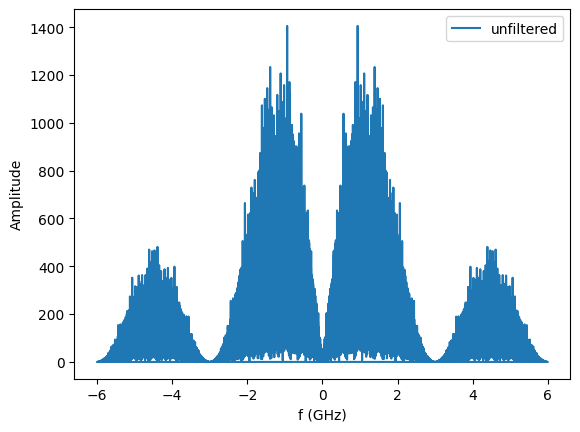

In [5]:
prbs_sequence = np.kron(2*np.random.randint(2,size=N//2)-1,np.array([1,-1]))
hibw_prbs_sequence = np.kron(prbs_sequence,np.ones(4))
prbs_fft  = np.fft.fft(hibw_prbs_sequence)
prbs_freq = np.fft.fftfreq(4*N,d=1/12)
%matplotlib inline
pl.plot(prbs_freq,np.abs(prbs_fft),label='unfiltered')
ax = pl.gca()
ax.set_xlabel('f (GHz)')
ax.set_ylabel('Amplitude')
ax.legend()

In [6]:
prbs_fft[:N+1] = 0
prbs_fft[3*N:] = 0

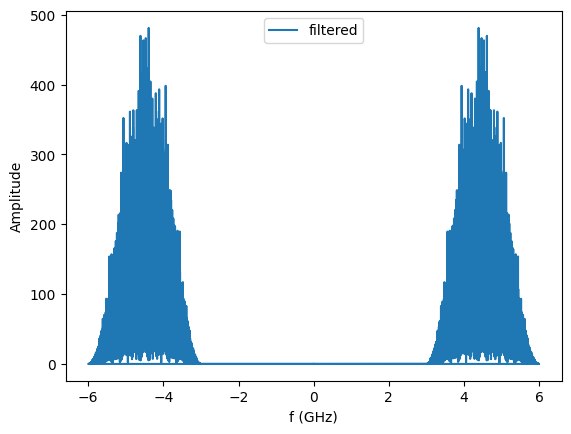

In [7]:
%matplotlib inline
pl.plot(prbs_freq,np.abs(prbs_fft),label='filtered')
ax = pl.gca()
ax.set_xlabel('f (GHz)')
ax.set_ylabel('Amplitude')
ax.legend()

Text(0, 0.5, 'Amplitude')

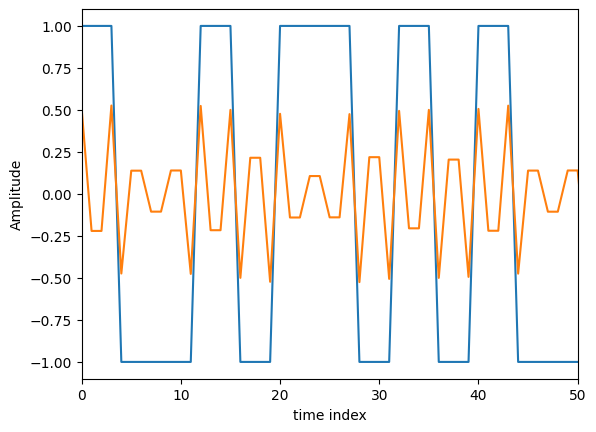

In [8]:
prbs_filtered = np.real(np.fft.ifft(prbs_fft))
%matplotlib inline
pl.plot(hibw_prbs_sequence)
pl.plot(prbs_filtered)
ax = pl.gca()
ax.set_xlim([0,50])
ax.set_xlabel('time index')
ax.set_ylabel('Amplitude')

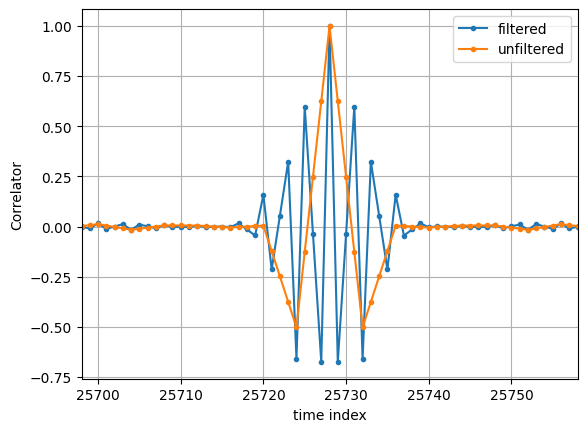

In [9]:
seq_fil_xcor = np.correlate(hibw_prbs_sequence,prbs_filtered,mode='same')
seq_seq_xcor = np.correlate(hibw_prbs_sequence,hibw_prbs_sequence,mode='same')
%matplotlib inline
pl.plot(seq_fil_xcor/np.max(seq_fil_xcor),'.-',label='filtered')
pl.plot(seq_seq_xcor/np.max(seq_seq_xcor),'.-',label='unfiltered')
ax = pl.gca()
ax.set_xlim([2*N-30,2*N+30])
ax.grid()
ax.set_xlabel('time index')
ax.set_ylabel('Correlator')
ax.legend()

# BW-limited acquisition
Ok, now we will digitize the signal at the rate the bits are actually generated and se what the correlator looks like. For that I will make a simple assumption, the integration time of the digitizer is inversely proportional to its sampling rate. This means that each acquired point will be the average across the digitization time.

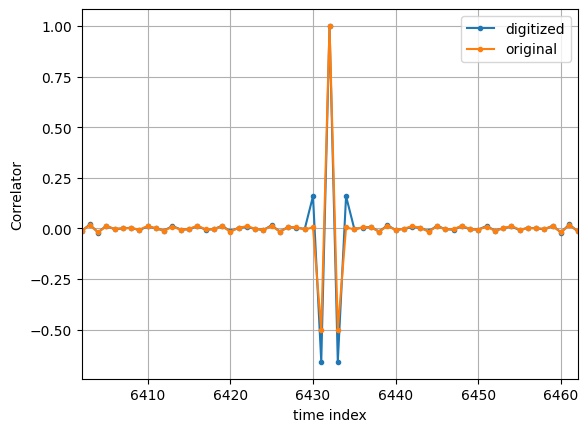

In [10]:
digitized_filtered_prbs = np.zeros(N)
for i in range(N):
    initial = 4*i
    final = 4*(i+1)
    digitized_filtered_prbs[i] = np.sum(prbs_filtered[initial:final])

seq_digi_xcor = np.correlate(prbs_sequence,digitized_filtered_prbs,mode='same')
seq_seq_xcor  = np.correlate(prbs_sequence,prbs_sequence,mode='same')
%matplotlib inline
pl.plot(seq_digi_xcor/np.max(seq_digi_xcor),'.-',label='digitized')
pl.plot(seq_seq_xcor/np.max(seq_seq_xcor),'.-',label='original')
ax = pl.gca()
ax.set_xlim([N//2-30,N//2+30])
ax.grid()
ax.set_xlabel('time index')
ax.set_ylabel('Correlator')
ax.legend()
